<a href="https://colab.research.google.com/github/arafiardnsyh/US_Delay_Flight/blob/main/Salinan_dari_Airline_Delay_Cause.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files

# Upload file
uploaded = files.upload()

# Load dataset into a DataFrame
df = pd.read_csv('Airline_Delay_Cause.csv')


Saving Airline_Delay_Cause.csv to Airline_Delay_Cause.csv


In [ ]:
# Display the first few rows
df.head()

# Check for missing values
df.isnull().sum()

# Display dataset info
df.info()

# Display basic statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101315 entries, 0 to 101314
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 101315 non-null  int64  
 1   month                101315 non-null  int64  
 2   carrier              101315 non-null  object 
 3   carrier_name         101315 non-null  object 
 4   airport              101315 non-null  object 
 5   airport_name         101315 non-null  object 
 6   arr_flights          101157 non-null  float64
 7   arr_del15            100960 non-null  float64
 8   carrier_ct           101157 non-null  float64
 9   weather_ct           101157 non-null  float64
 10  nas_ct               101157 non-null  float64
 11  security_ct          101157 non-null  float64
 12  late_aircraft_ct     101157 non-null  float64
 13  arr_cancelled        101157 non-null  float64
 14  arr_diverted         101157 non-null  float64
 15  arr_delay        

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,101315.000000,101315.000000,101157.000000,100960.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000,101157.000000
mean,2019.516261,6.279633,336.033413,58.073217,18.457503,2.047227,17.234516,0.153487,20.067422,7.969137,0.773362,3817.083069,1319.266744,212.609785,838.294967,7.370395,1439.534031
std,1.558253,3.438409,942.283273,163.327000,47.042014,6.878678,58.427910,0.734138,63.043181,50.943481,3.395803,11715.243158,3941.461650,810.274436,3390.448796,44.296998,4636.488256
min,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,42.000000,5.000000,1.920000,0.000000,0.940000,0.000000,1.000000,0.000000,0.000000,265.000000,86.000000,0.000000,24.000000,0.000000,42.000000
50%,2020.000000,6.000000,90.000000,14.000000,5.280000,0.240000,3.200000,0.000000,3.960000,1.000000,0.000000,865.000000,316.000000,12.000000,120.000000,0.000000,253.000000
75%,2021.000000,9.000000,227.000000,40.000000,14.610000,1.660000,9.850000,0.000000,12.640000,4.000000,1.000000,2520.000000,990.000000,132.000000,401.000000,0.000000,916.000000
max,2022.000000,12.000000,21931.000000,4176.000000,1147.000000,226.000000,1884.420000,58.690000,1531.810000,4951.000000,154.000000,429194.000000,151581.000000,28294.000000,112018.000000,3760.000000,147167.000000


In [ ]:
# Fill missing values with 0 for delay counts
delay_columns = [
    'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
    'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
    'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
    'security_delay', 'late_aircraft_delay'
]
df[delay_columns] = df[delay_columns].fillna(0)


In [ ]:
# Cleaning Duplicate
df = df.drop_duplicates()

In [ ]:
#convert columns to categorical
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['carrier'] = df['carrier'].astype('category')
df['airport'] = df['airport'].astype('category')

In [ ]:
# Check again for missing values
df.isnull().sum()


,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,0
arr_del15,0
carrier_ct,0
weather_ct,0


In [ ]:
# Calculate total and delayed flights
total_flights = df['arr_flights'].sum()
delayed_flights = df['arr_del15'].sum()

print(f"Total Flights: {total_flights}")
print(f"Delayed Flights: {delayed_flights}")


Total Flights: 33992132.0
Delayed Flights: 5863072.0


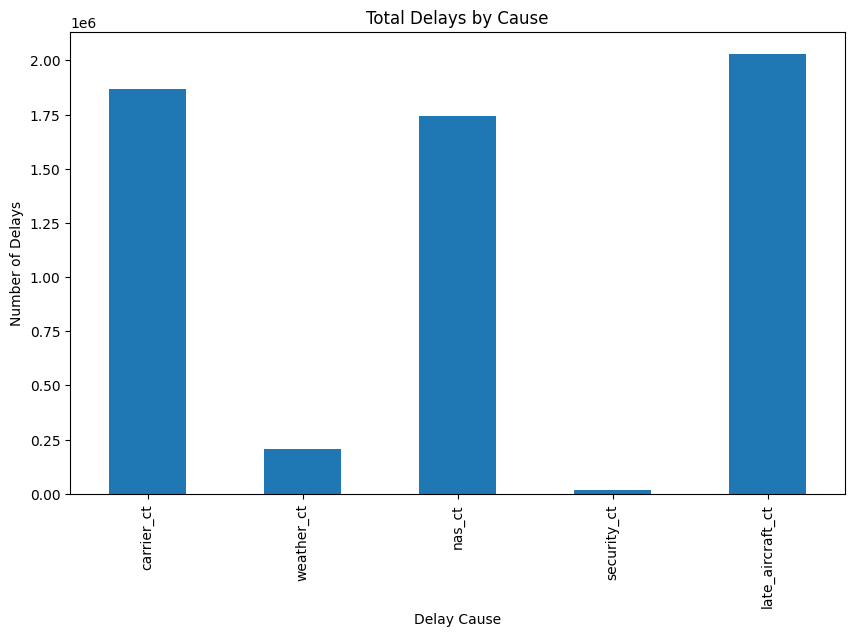

In [ ]:
# Calculate total delays by cause
delay_causes = df[['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']].sum()
delay_causes.plot(kind='bar', figsize=(10, 6))
plt.title('Total Delays by Cause')
plt.ylabel('Number of Delays')
plt.xlabel('Delay Cause')
plt.show()


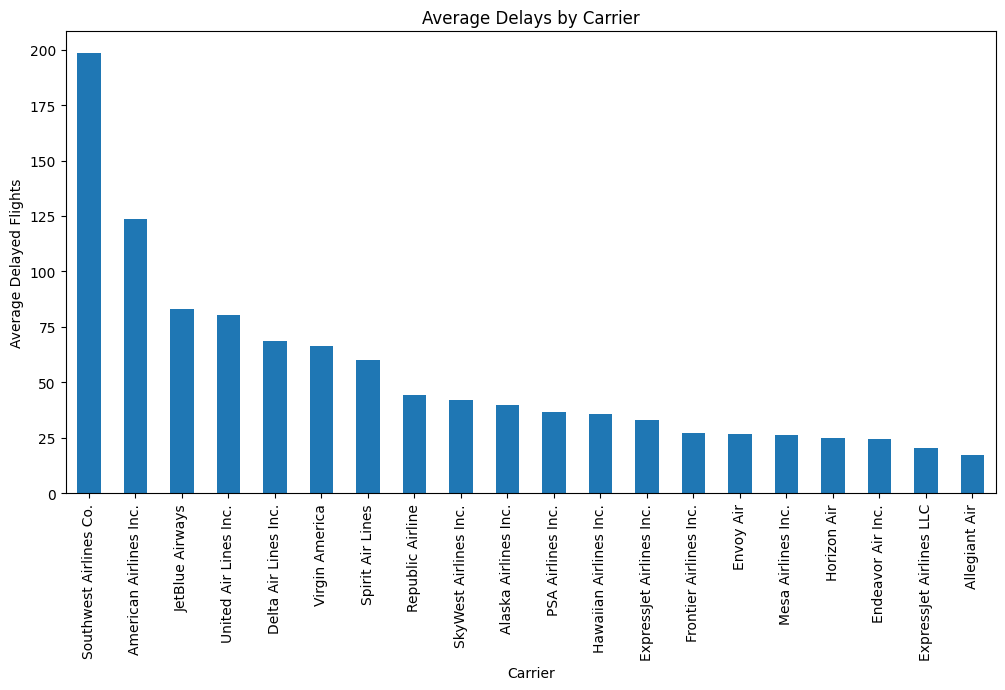

In [ ]:
# Average delay by carrier
avg_delay_by_carrier = df.groupby('carrier_name')['arr_del15'].mean().sort_values(ascending=False)

# Plot
avg_delay_by_carrier.plot(kind='bar', figsize=(12, 6))
plt.title('Average Delays by Carrier')
plt.ylabel('Average Delayed Flights')
plt.xlabel('Carrier')
plt.show()


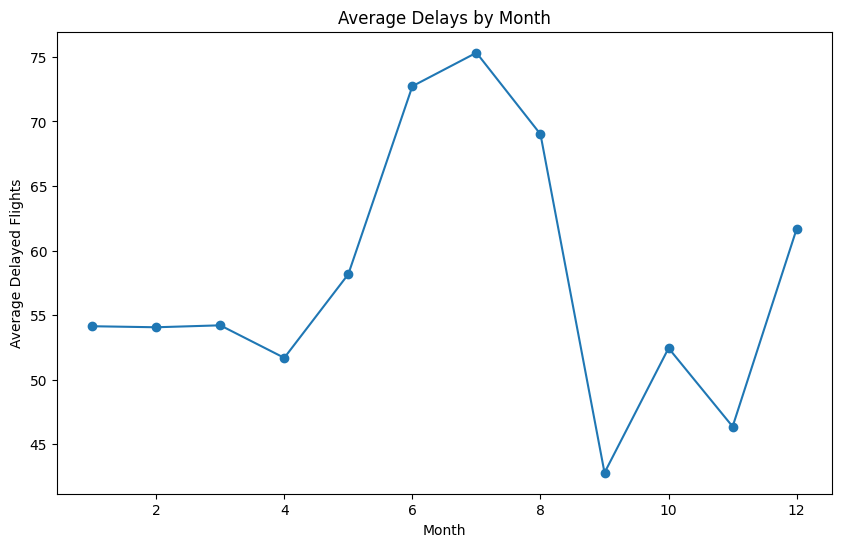

In [ ]:
# Average delays by month
avg_delay_by_month = df.groupby('month')['arr_del15'].mean()

# Line plot
avg_delay_by_month.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Delays by Month')
plt.ylabel('Average Delayed Flights')
plt.xlabel('Month')
plt.show()


In [ ]:
# Save cleaned dataset for further analysis
df.to_csv('cleaned_airline_delay_data.csv', index=False)

# Download the file
from google.colab import files
files.download('cleaned_airline_delay_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>